In [1]:
import tensorflow as tf; print(tf.__version__)
import tensorflow.keras
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import RMSprop

import numpy as np
import tqdm; print(tqdm.__version__)
import matplotlib.pyplot as plt
%matplotlib inline

2.0.0
4.28.1


In [2]:
file_names_treino = !find datasets/airport-alunos/treino -name '???.png' | sort
file_names_val = !find datasets/airport-alunos/val -name '???.png' | sort

print(file_names_treino[:2])
print(file_names_val[:2])

['datasets/airport-alunos/treino/0/000/000.png', 'datasets/airport-alunos/treino/0/000/001.png']
['datasets/airport-alunos/val/0/200/000.png', 'datasets/airport-alunos/val/0/200/001.png']


In [3]:
from dataset_utils import person_to_img
# carrega imagens para memória
cam_img_dict_treino, pids1_treino, pids2_treino = person_to_img(file_names_treino)
#cam_img_dict_val, pids1_val, pids2_val = person_to_img(file_names_val)

Images in cam1 = 14094, cam2 = 14939


In [4]:
from tripplet_data import generate_data
X_anchor, X_pos, X_neg = generate_data(cam_img_dict_treino, pids1_treino, pids2_treino, batch=1)

(14094, 128, 64, 3)
(14094, 128, 64, 3)
(14094, 128, 64, 3)


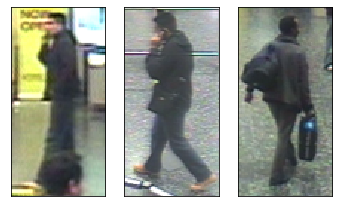

In [5]:
print(X_anchor.shape)
print(X_pos.shape)
print(X_neg.shape)
from dataset_utils import show_side_by_side
show_side_by_side(np.array([X_anchor[0]/255, X_pos[0]/255, X_neg[0]/255]))

(14094, 128, 64, 3)
(14094, 128, 64, 3)
(14094, 128, 64, 3)


In [21]:
def (figs, titles = None, limit = 10, figsize=(20, 4), cmap = 'gray', grid = False):
    minval = min(limit, figs.shape[0])
    plt.figure(figsize = figsize)
    for i in range(minval):
        subplot = plt.subplot(1, limit, i + 1)
        extent = (0, figs[i].shape[1], figs[i].shape[0], 0)
        subplot.imshow(figs[i], cmap = cmap, extent = extent)
        if titles:
            subplot.set_title(titles[i])
        if grid:
            subplot.grid(color='gray', linestyle='-', linewidth=1)
        else:
            subplot.get_xaxis().set_visible(False)
            subplot.get_yaxis().set_visible(False)
    plt.show()

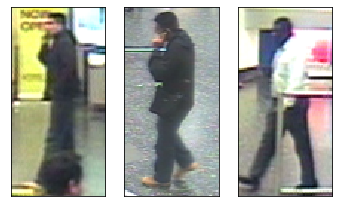